In [1]:
import pyhepmc
import graphviz
import matplotlib.pyplot as plt

In [7]:
import os
os.getcwd()

'/net/e4-nfs-home.e4.physik.tu-dortmund.de/home/cgrunwald/projects/KISS/sherpa.bat/cpp_interface/Batsher'

In [8]:
bat_events = "../output/events_bat.hepmc"
sherpa_events = "../output/events_sherpa.hepmc"

In [11]:
# Test that files are OK:
with pyhepmc.open(sherpa_events) as f:
    event = f.read()
    
    print(event)


________________________________________________________________________
GenEvent: #0
 Momentum units: GEV Position units: MM
 Entries in this event: 1 vertices, 5 particles, 4 weights.
 Position offset: 0, 0, 0, 0
                                    GenParticle Legend
         ID    PDG ID   ( px,       py,       pz,     E )   Stat ProdVtx
________________________________________________________________________
Vtx:     -1 stat:   0 (X,cT): 0
 I:       1       21 +0.00e+00,+0.00e+00,+5.00e+02,+5.00e+02   3     0
          2       21 +0.00e+00,+0.00e+00,-5.00e+02,+5.00e+02   3     0
 O:       3       21 +1.35e+02,+1.22e+02,+2.76e+02,+3.30e+02   3    -1
          4       21 +2.08e+02,-1.54e+02,-1.67e+02,+3.08e+02   3    -1
          5       21 -3.43e+02,+3.28e+01,-1.09e+02,+3.62e+02   3    -1
________________________________________________________________________



In [13]:
def leading_pT(event):
    pT_max = max([p.momentum.pt() for p in event.particles])
    return pT_max

In [14]:
bat_pT = []

with pyhepmc.open(bat_events) as f:
    for event in f:
        #print(event)
        bat_pT.append(leading_pT(event))

In [15]:
sherpa_pT = []

with pyhepmc.open(sherpa_events) as f:
    for event in f:
        #print(event)
        sherpa_pT.append(leading_pT(event))

## Plot histogram of leading pT

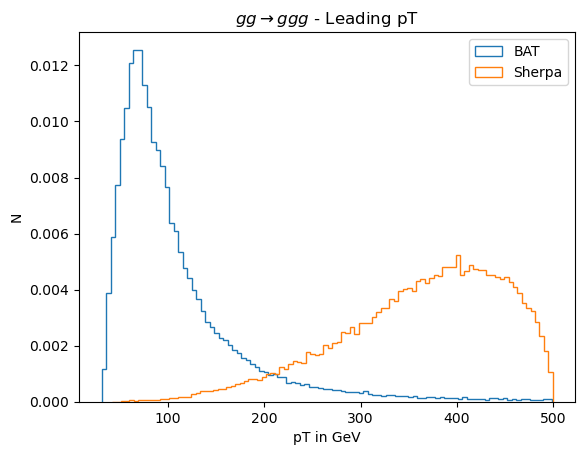

In [23]:
density = True
plt.hist(bat_pT, bins=100, histtype='step', label="BAT", density=density) 
plt.hist(sherpa_pT, bins=100, histtype='step', label="Sherpa", density=density)

plt.legend(loc='best')

plt.xlabel('pT in GeV')
plt.ylabel('N')
plt.title('$ gg \\rightarrow ggg $ - Leading pT')

# Display the plot
plt.show()